In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS= set(stopwords.words('english'))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
import pickle
import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maddu_o0argzr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Python\Mobile Dataset.csv")

In [4]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [5]:
df.tail()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0
413839,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,Only downside is that apparently Verizon no lo...,0.0


In [6]:
print(df.columns)

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')


In [7]:
df.shape

(413840, 6)

In [8]:
df.duplicated().sum()

64079

In [9]:
df = df.drop_duplicates()

In [10]:
df.isnull().sum()

Product Name        0
Brand Name      54737
Price            5237
Rating              0
Reviews            57
Review Votes    12274
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df = df.iloc[:50000]

In [14]:
from bs4 import BeautifulSoup
import re

def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove special characters and extra whitespace
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Example usage:
df['Reviews'] = df['Reviews'].apply(clean_text)


In [15]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)

# Example usage:
df['Reviews_Tokens'] = df['Reviews'].apply(tokenize_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maddu_o0argzr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def normalize_text(tokens):
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Apply stemming
    tokens = [stemmer.stem(token) for token in tokens]
    # Apply lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Example usage:
df['Reviews_Normalized'] = df['Reviews_Tokens'].apply(normalize_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maddu_o0argzr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maddu_o0argzr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Reviews_Tokens,Reviews_Normalized
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used phone ...,1.0,"[I, feel, so, LUCKY, to, have, found, this, us...","[feel, lucki, found, use, phone, u, use, hard,..."
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice up grade from my pantach revue...,0.0,"[nice, phone, nice, up, grade, from, my, panta...","[nice, phone, nice, grade, pantach, revu, clea..."
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,"[Very, pleased]",[plea]
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,"[It, works, good, but, it, goes, slow, sometim...","[work, good, goe, slow, sometim, good, phone, ..."
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone The only ...,0.0,"[Great, phone, to, replace, my, lost, phone, T...","[great, phone, replac, lost, phone, thing, vol..."
...,...,...,...,...,...,...,...,...
78711,Apple Smart Watch Sport 38mm - Stainless Steel...,Apple,269.99,4,I do love the watch the only issue is the batt...,4.0,"[I, do, love, the, watch, the, only, issue, is...","[love, watch, issu, batteri, life, mayb, mine,..."
78712,Apple Smart Watch Sport 38mm - Stainless Steel...,Apple,269.99,1,The battery was bad I returned,0.0,"[The, battery, was, bad, I, returned]","[batteri, bad, return]"
78713,Apple Smart Watch Sport 38mm - Stainless Steel...,Apple,269.99,5,Ive wearing the Apple Watch for one month It h...,0.0,"[Ive, wearing, the, Apple, Watch, for, one, mo...","[ive, wear, appl, watch, one, month, given, tr..."
78714,Apple Smart Watch Sport 38mm - Stainless Steel...,Apple,269.99,5,still going strong no problems or scratches ei...,0.0,"[still, going, strong, no, problems, or, scrat...","[still, go, strong, problem, scratch, either]"


In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming 'data' is your DataFrame
df['Reviews'] = df['Reviews'].astype(str)  # Convert 'Reviews' column to string type

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Review Length
df['Review_Length'] = df['Reviews'].apply(lambda x: len(x.split()))

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['Reviews'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Price vs. Rating
df['Price_Rating_Ratio'] = df['Price'] / df['Rating']

# Suspicious Review Votes
threshold_votes = 50 # You can adjust this threshold as needed
df['Suspicious_Votes'] = df['Review Votes'] > threshold_votes

# Print or analyze the dataframe to see the results
print(df.head())


                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  \
0       5  I feel so LUCKY to have found this used phone ...           1.0   
1       4  nice phone nice up grade from my pantach revue...           0.0   
2       5                                       Very pleased           0.0   
3       4  It works good but it goes slow sometimes but i...           0.0   
4       4  Great phone to replace my lost phone The only ...           0.0   

                                      Reviews_Tokens  \
0  [I, feel, so, LUCKY, 

In [19]:
# Define thresholds for each attribute
SENTIMENT_THRESHOLD = 0.1  # Positive sentiment threshold
REVIEW_LENGTH_THRESHOLD = 10  # Minimum review length
PRICE_RATING_RATIO_THRESHOLD = 10  # Maximum allowed price/rating ratio
SUSPICIOUS_VOTES_THRESHOLD = 50  # Number of review votes to consider as suspicious

# Identify fake reviews based on thresholds
df['Fake_Review'] = (
    (df['Sentiment'] < SENTIMENT_THRESHOLD) |  # Low sentiment
    (df['Review_Length'] < REVIEW_LENGTH_THRESHOLD) |  # Short review
    (df['Price_Rating_Ratio'] > PRICE_RATING_RATIO_THRESHOLD) |  # High price/rating ratio
    (df['Suspicious_Votes'])  # Suspicious review votes
)

# Convert boolean values to 1 (True) and 0 (False)
df['Fake_Review'] = df['Fake_Review'].astype(int)

# Print or analyze the dataframe to see the results
print(df[['Reviews', 'Sentiment', 'Review_Length', 'Price_Rating_Ratio', 'Suspicious_Votes', 'Fake_Review']].head())


                                             Reviews  Sentiment  \
0  I feel so LUCKY to have found this used phone ...     0.8379   
1  nice phone nice up grade from my pantach revue...     0.9231   
2                                       Very pleased     0.4927   
3  It works good but it goes slow sometimes but i...     0.9185   
4  Great phone to replace my lost phone The only ...     0.2263   

   Review_Length  Price_Rating_Ratio  Suspicious_Votes  Fake_Review  
0             69             39.9980             False            1  
1             40             49.9975             False            1  
2              2             39.9980             False            1  
3             17             49.9975             False            1  
4             43             49.9975             False            1  


In [20]:
print(f"Rating value count: \n{df['Fake_Review'].value_counts()}")

Rating value count: 
Fake_Review
1    49000
0     1000
Name: count, dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 78715
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product Name        50000 non-null  object 
 1   Brand Name          50000 non-null  object 
 2   Price               50000 non-null  float64
 3   Rating              50000 non-null  int64  
 4   Reviews             50000 non-null  object 
 5   Review Votes        50000 non-null  float64
 6   Reviews_Tokens      50000 non-null  object 
 7   Reviews_Normalized  50000 non-null  object 
 8   Sentiment           50000 non-null  float64
 9   Review_Length       50000 non-null  int64  
 10  Price_Rating_Ratio  50000 non-null  float64
 11  Suspicious_Votes    50000 non-null  bool   
 12  Fake_Review         50000 non-null  int32  
dtypes: bool(1), float64(4), int32(1), int64(2), object(5)
memory usage: 4.8+ MB


In [22]:
df.describe()

,Price,Rating,Review Votes,Sentiment,Review_Length,Price_Rating_Ratio,Fake_Review
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,300.774291,3.89420,2.134480,0.353572,27.564720,108.147890,0.980000
std,235.576859,1.58607,13.795395,0.492797,61.256719,135.361218,0.140001
min,17.950000,1.00000,0.000000,-0.992000,0.000000,3.590000,0.000000
25%,125.000000,3.00000,0.000000,0.000000,5.000000,31.000000,1.000000
50%,224.770000,5.00000,0.000000,0.493900,13.000000,59.800000,1.000000
75%,500.000000,5.00000,1.000000,0.757900,30.000000,129.600000,1.000000
max,2000.000000,5.00000,478.000000,0.999700,1672.000000,1157.000000,1.000000


In [23]:
print(f"The brands available are: \n{df['Brand Name'].value_counts()}")

The brands available are: 
Brand Name
Apple                                          47444
Alcatel                                         1194
Amazon.com, LLC *** KEEP PORules ACTIVE ***      612
JUNING                                           184
Jethro                                           104
Ulefone                                           71
Nokia                                             67
Samsung                                           37
OtterBox                                          30
star                                              29
VKworld                                           27
e passion                                         25
HTM                                               24
Acer                                              19
Jiuhe                                             18
amar                                              17
Elephone                                          11
Plum                                              10
Apple Co

In [24]:
print(f"The ratings are: \n{df['Rating'].value_counts()}")

The ratings are: 
Rating
5    30058
1     9396
4     5664
3     2604
2     2278
Name: count, dtype: int64


In [26]:
corpus = []
for i in range(0, df.shape[0]):
    review = str(df.iloc[i]["Reviews"])  # Convert to string
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if word.lower() not in STOPWORDS]  # Use word.lower() to match case
    review = ' '.join(review)
    corpus.append(review)

In [28]:
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()
y = df['Fake_Review'].values

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the training and testing sets
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (35000, 2500)
y train: (35000,)
X test: (15000, 2500)
y test: (15000,)


In [30]:
print(f"X train max value:{X_train.max()}")
print(f"X test max value:{X_test.max()}")

X train max value:43
X test max value:32


In [31]:
scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.fit_transform(X_test)

In [32]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
y_pred = model_xgb.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9785333333333334
Precision: 0.9789178731069451
Recall: 0.9995912528101369
F1-score: 0.9891465552110018

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.02      0.03       321
           1       0.98      1.00      0.99     14679

    accuracy                           0.98     15000
   macro avg       0.72      0.51      0.51     15000
weighted avg       0.97      0.98      0.97     15000



In [34]:
cm = confusion_matrix(y_test, y_pred)

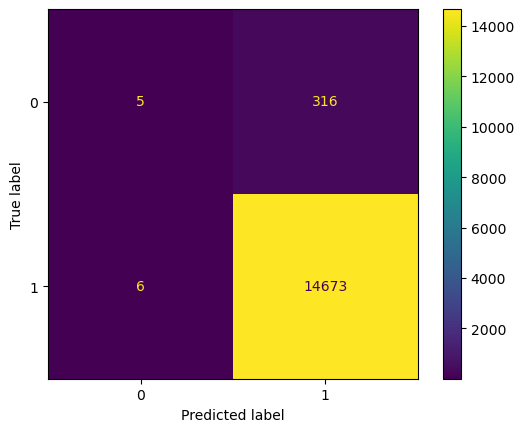

In [35]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model_xgb.classes_)
cm_display.plot()
plt.show()

In [36]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [37]:
# Predict on the test set
y_pred = model_rf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9744
Precision: 0.9785097409118297
Recall: 0.9957081545064378
F1-score: 0.987034035656402

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       321
           1       0.98      1.00      0.99     14679

    accuracy                           0.97     15000
   macro avg       0.49      0.50      0.49     15000
weighted avg       0.96      0.97      0.97     15000



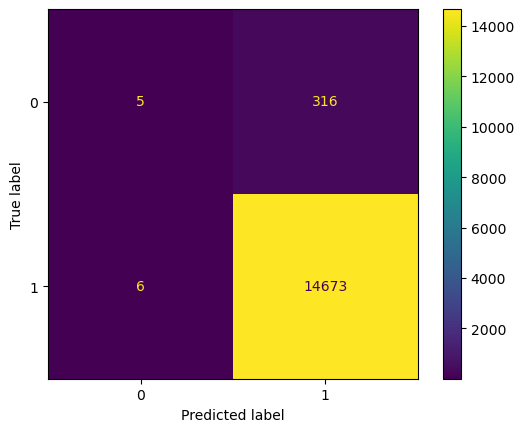

In [38]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model_rf.classes_)
cm_display.plot()
plt.show()

In [39]:
# Initialize SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [40]:
# Predict on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9774666666666667
Precision: 0.9787035182588958
Recall: 0.998705633898767
F1-score: 0.9886034122327872

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.01      0.01       321
           1       0.98      1.00      0.99     14679

    accuracy                           0.98     15000
   macro avg       0.54      0.50      0.50     15000
weighted avg       0.96      0.98      0.97     15000



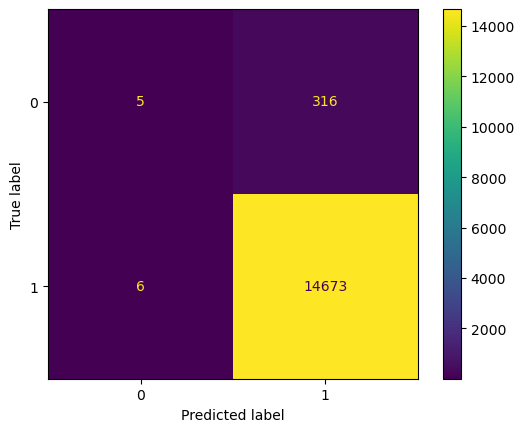

In [41]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = svm_model.classes_)
cm_display.plot()
plt.show()

In [43]:
# Combine 'Reviews' and 'Brand Name' columns for better feature representation
df['Combined_Text'] = df['Reviews'] + ' ' + df['Brand Name'].fillna('') 

# Split data into features (X) and target variable (y)
X = df['Combined_Text']
y = df['Fake_Review']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize CountVectorizer with n-gram range
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))  # You can adjust the n-gram range as needed

# Transform text data into numerical features
X_train_transformed = ngram_vectorizer.fit_transform(X_train)
X_test_transformed = ngram_vectorizer.transform(X_test)

# Initialize Naive Bayes classifier
naive_bayes = MultinomialNB()

# Train the model
naive_bayes.fit(X_train_transformed, y_train)

# Predict on the testing set
y_pred = naive_bayes.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9768666666666667
Precision: 0.9785628422599172
Recall: 0.99822876217726
F1-score: 0.9882979799682999

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       321
           1       0.98      1.00      0.99     14679

    accuracy                           0.98     15000
   macro avg       0.49      0.50      0.49     15000
weighted avg       0.96      0.98      0.97     15000


Confusion Matrix:
[[    0   321]
 [   26 14653]]


In [45]:
# Define the thresholds for sentiment categories
thresholds = [-float('inf'), -0.5, 0.5, float('inf')]  # Adjust threshold values as needed
sentiment_labels = pd.cut(df['Sentiment'], bins=thresholds, labels=['negative', 'neutral', 'positive'])

# Update the 'sentiment' column with categorical labels
df['Sentiment'] = sentiment_labels

In [47]:
# Count the number of positive, negative, and neutral reviews
sentiment_counts = df['Sentiment'].value_counts()

# Print the counts
print("Number of positive reviews:", sentiment_counts['positive'])
print("Number of negative reviews:", sentiment_counts['negative'])
print("Number of neutral reviews:", sentiment_counts['neutral'])

Number of positive reviews: 24942
Number of negative reviews: 3979
Number of neutral reviews: 21079


In [48]:
# Separate fake and real reviews
fake_reviews = df[df['Fake_Review'] == False]
real_reviews = df[df['Fake_Review'] == True]

# Calculate sentiment counts for fake reviews
fake_sentiment_counts = fake_reviews['Sentiment'].value_counts()

# Calculate sentiment counts for real reviews
real_sentiment_counts = real_reviews['Sentiment'].value_counts()

# Print sentiment counts for fake reviews
print("Fake reviews:")
print("Number of positive reviews:", fake_sentiment_counts.get('positive', 0))
print("Number of negative reviews:", fake_sentiment_counts.get('negative', 0))
print("Number of neutral reviews:", fake_sentiment_counts.get('neutral', 0))

# Print sentiment counts for real reviews
print("\nReal reviews:")
print("Number of positive reviews:", real_sentiment_counts.get('positive', 0))
print("Number of negative reviews:", real_sentiment_counts.get('negative', 0))
print("Number of neutral reviews:", real_sentiment_counts.get('neutral', 0))


Fake reviews:
Number of positive reviews: 838
Number of negative reviews: 0
Number of neutral reviews: 162

Real reviews:
Number of positive reviews: 24104
Number of negative reviews: 3979
Number of neutral reviews: 20917


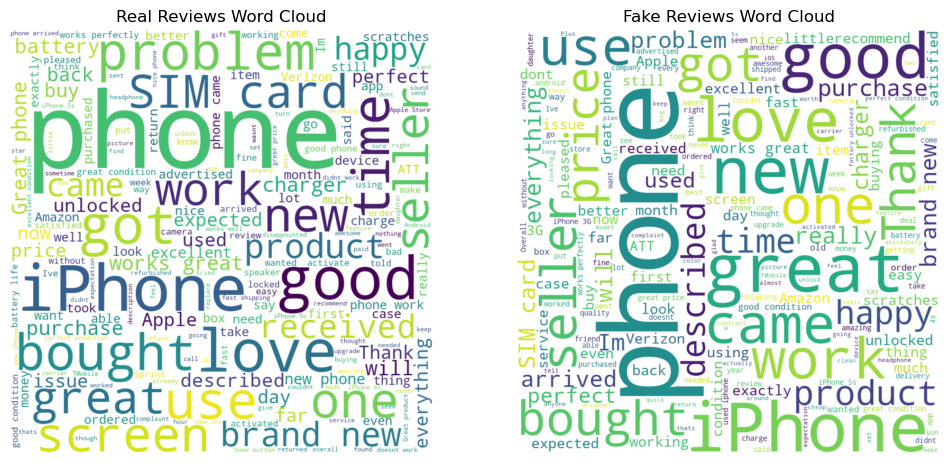

In [49]:
# Convert 'body' column to strings and replace NaNs with empty strings for real reviews
real_text = ' '.join(real_reviews['Reviews'].astype(str).fillna(''))

# Convert 'body' column to strings and replace NaNs with empty strings for fake reviews
fake_text = ' '.join(fake_reviews['Reviews'].astype(str).fillna(''))


# Generate word cloud for real reviews
real_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(real_text)

# Generate word cloud for fake reviews
fake_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(fake_text)

# Plot the word clouds
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Real Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake Reviews Word Cloud')
plt.axis('off')

plt.show()